# Part 3

In [1]:
# ECE 8890 First Project Part 3
# Wenlong Wu 14255109|

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [2]:
## define activation function
clipping_val = 0.05
def sigmoid(x, derive=False): # the real sigmoid function
    if derive:
        tmp = x * (1 - x)  
        x_der = (tmp > clipping_val) * tmp + (tmp < clipping_val) * clipping_val
        return x_der
    return 1 / (1 + np.exp(-x))

def tanh(x, derive=False):
    if derive:
        return (1 - x) * (1 + x)
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x, derive=False):
    if derive:
        return 1. * (x > 0)
    return x * (x > 0)

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    #e_x = np.exp(x)
    return e_x / e_x.sum()

def imshow(x):
    pixels = x[:28*28].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [3]:
from scipy.io import loadmat
x = loadmat('Part3.mat')

TrainData = x['TrainData']
TestData = x['TestData']
print('Train data without bias shape is: ' + str(TrainData.shape))
print('Test data without bias shape is: ' + str(TestData.shape))

#TrainData = TrainData[:,:,:100]
#print('Train data without bias shape is: ' + str(TrainData.shape))

Train data without bias shape is: (10, 784, 500)
Test data without bias shape is: (10, 784, 500)


In [4]:
train_bias = np.ones((TrainData.shape[0],1,TrainData.shape[2]))
test_bias = np.ones((TestData.shape[0],1,TestData.shape[2]))
TrainData = np.concatenate((TrainData,train_bias),axis=1)
TestData = np.concatenate((TestData,test_bias),axis=1)
print('Train data with bias shape is: ' + str(TrainData.shape))
print('Test data with bias shape is: ' + str(TestData.shape))

Train data with bias shape is: (10, 785, 500)
Test data with bias shape is: (10, 785, 500)


In [5]:
label = np.eye(10).reshape((10,10,1)) # ten digits, each one_hot vector
train_label = np.repeat(label, repeats= TrainData.shape[2], axis=2) # 10 x 10 x 20
test_label = np.repeat(label, repeats= TestData.shape[2], axis=2)

TrainData = np.concatenate((TrainData,train_label),axis=1)
TestData = np.concatenate((TestData,test_label),axis=1)
TrainData = np.transpose(TrainData, axes=[1,0,2])
TestData = np.transpose(TestData, axes=[1,0,2])
print('Train data with bias, adding label shape is: ' + str(TrainData.shape))
print('Test data with bias, adding label shape is: ' + str(TestData.shape))

Train data with bias, adding label shape is: (795, 10, 500)
Test data with bias, adding label shape is: (795, 10, 500)


In [6]:
TrainData = np.reshape(TrainData,(TrainData.shape[0],-1))
TestData = np.reshape(TestData,(TestData.shape[0],-1))
print('Train data with bias, adding label, after reshaping shape is: ' + str(TrainData.shape))
print('Test data with bias, adding label, after reshaping shape is: ' + str(TestData.shape))

Train data with bias, adding label, after reshaping shape is: (795, 5000)
Test data with bias, adding label, after reshaping shape is: (795, 5000)


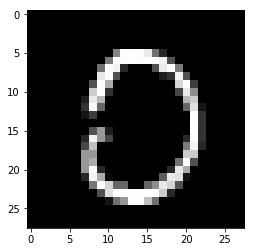

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
# random select a number to see if the image match the label
random_num = 177
imshow(TrainData[:,random_num])
print(TrainData[785:,random_num])

-----

In [8]:
# initialize weights with random numbers
np.random.seed(2019)
kernel_size = 7
kernel_num = 16
k_w = np.random.normal(0,1,(kernel_size * kernel_size + 1, kernel_num)) * 0.01
h1_w = np.random.normal(0,1,((28 - kernel_size + 1)*(28 - kernel_size + 1)*(kernel_num) + 1, 128)) * 0.01
h2_w = np.random.normal(0,1,(128 + 1, 10)) * 0.01

# mini-batch 
mini_batch = 1
k_w_tmp = np.zeros_like(k_w)
h1_w_tmp = np.zeros_like(h1_w)
h2_w_tmp = np.zeros_like(h2_w)

print('16 kernel weight shape is: ' + str(k_w.shape))
print('First fully connected layer weight shape is: ' + str(h1_w.shape))
print('Second fully connected layer weight shape is: ' + str(h2_w.shape))

16 kernel weight shape is: (50, 16)
First fully connected layer weight shape is: (7745, 128)
Second fully connected layer weight shape is: (129, 10)


The 1 epoch error is: [3800.60307091]
The 2 epoch error is: [926.27037418]
The 3 epoch error is: [489.47325995]
The 4 epoch error is: [290.22855863]
The 5 epoch error is: [185.55458874]
The 6 epoch error is: [102.46266117]
The 7 epoch error is: [54.83278371]
The 8 epoch error is: [47.38417655]
The 9 epoch error is: [11.49111752]
The 10 epoch error is: [2.59658573]
The 11 epoch error is: [1.69852141]
The 12 epoch error is: [1.32598082]
The 13 epoch error is: [1.10254385]
The 14 epoch error is: [0.94116892]
The 15 epoch error is: [0.82541667]
The 16 epoch error is: [0.73878423]
The 17 epoch error is: [0.66672443]
The 18 epoch error is: [0.60762465]
The 19 epoch error is: [0.55842872]
The 20 epoch error is: [0.51743903]
The 21 epoch error is: [0.48200944]
The 22 epoch error is: [0.45112405]
The 23 epoch error is: [0.42345408]
The 24 epoch error is: [0.39971433]
The 25 epoch error is: [0.37815316]
The 26 epoch error is: [0.35876756]
The 27 epoch error is: [0.34160077]
The 28 epoch error is

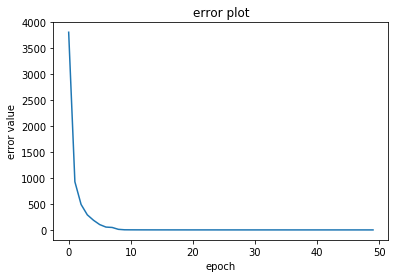

In [9]:
# learning rate
eta = 0.01

epoch = 50
err = np.zeros((epoch, 1))
inds = np.arange(0,TrainData.shape[1],1)

for k in range(epoch):
    
    # init error
    err[k] = 0
    
    # random shuffle of data each epoch
    inds = np.random.permutation(inds)
    for i in range(TrainData.shape[1]):

        # random index
        inx = inds[i]
        
        # one image
        img = np.reshape(TrainData[:28*28, inx], [28, 28])
        
        # forwards pass        
        # transform matrix C
        C = np.ones((28 - kernel_size + 1, 28 - kernel_size + 1, kernel_size * kernel_size))

        for m in range(kernel_size):
            for n in range(kernel_size):
                C[:,:,m * kernel_size + n] = img[m:m+(28 - kernel_size + 1),n:n+(28 - kernel_size + 1)]
        C=np.concatenate((C, np.ones([28 - kernel_size + 1, 28 - kernel_size + 1,1])),axis=2)
        
        h_1 = relu(np.dot(C, k_w)) # 22 x 22 x 16
        
        # hidden layer(s)
        h_1 = np.reshape(h_1, [(28 - kernel_size + 1)*(28 - kernel_size + 1)*(kernel_num), 1])
        h_1 = np.concatenate((h_1,np.asarray([[1]])),axis=0) # (22 * 22 * 16 + 1) x 1
        h_2 = relu(np.dot(h_1.T, h1_w)) # 1 x 128
        #h_2 = np.concatenate((h_2 - np.mean(h_2) / np.cov(h_2),np.asarray([[1]])),axis=1) # 1 x (128 + 1)
        h_2 = np.concatenate((h_2, np.asarray([[1]])),axis=1) # 1 x (128 + 1)
        o = softmax(np.dot(h_2, h2_w)) # 1 x 10
                
        # MSE error
        #err[k] = err[k] + 0.5 * np.sum((o - TrainData[785:,inx]) ** 2)
        
        # cross entropy
        err[k] = err[k] + (-1.0) * np.sum(TrainData[785:,inx] * np.log(o + 10 ** -8))
        
        # backprop < ---
        
        # output layer
        delta_1 = (-1.0) * (TrainData[785:,inx] - o) # (1, 10)
        #delta_2 = sigmoid(o, derive=True) # (1, 10)
        delta_2 = np.ones_like(delta_1)
        
        # update the second fully connected hidden layer
        delta_h2_w = np.dot(h_2.T, delta_1 * delta_2) # (128 + 1, 10)
        
        # update the first fully connected hidden layer
        delta_3 = relu(h_2, derive=True) # 1 x (128 + 1)
        delta_h1_w = np.dot(h_1, np.sum(np.dot(delta_3.T, delta_1 * delta_2) * h2_w, axis=1)[:-1].reshape([1,-1])) # (22 * 22* 16 + 1, 128)
        
        # update the convolutional kernel
        delta_4 = relu(h_1, derive=True) # (22 * 22 * 16 + 1, 1)
        delta_kw_tmp = np.sum(np.dot(delta_4, np.sum(np.dot(delta_3.T, delta_1 * delta_2) * h2_w,axis=1)[:-1].reshape([1,-1])) * h1_w, axis=1)[:-1].reshape([(28 - kernel_size + 1),(28 - kernel_size + 1),kernel_num])
        delta_kw = np.dot(np.transpose(C,axes=[2,0,1]).reshape([k_w.shape[0],-1]), delta_kw_tmp.reshape([-1,kernel_num]))
        
        # mini-batch tmp value 
        h1_w_tmp = h1_w_tmp + (-1.0) * eta * delta_h1_w # (22 * 22 * 16 + 1, 128)
        h2_w_tmp = h2_w_tmp + (-1.0) * eta * delta_h2_w # (128 + 1, 10)
        k_w_tmp = k_w_tmp + (-1.0) * eta * delta_kw # (7 * 7 + 1, 16)
        
        # update rule
        if((k * TrainData.shape[1] + i) % mini_batch == 0):
            h1_w = h1_w + h1_w_tmp / mini_batch
            h2_w = h2_w + h2_w_tmp / mini_batch
            k_w = k_w + k_w_tmp / mini_batch
            h1_w_tmp = np.zeros_like(h1_w_tmp)
            h2_w_tmp = np.zeros_like(h2_w_tmp)
            k_w_tmp = np.zeros_like(k_w_tmp)
            
    print('The ' + str(k+1) + ' epoch error is: ' + str(err[k]))
        
# plot it        
fig = plt.figure()
plt.plot(err)
plt.title('error plot')
plt.xlabel('epoch')
plt.ylabel('error value')
plt.show()
fig.savefig('conv_128_10.png', dpi=fig.dpi)

---

In [10]:
# Look at the training data
train_acc = 0
for i in range(TrainData.shape[1]):

    # one image
    img = np.reshape(TrainData[:28*28, i], [28, 28])
    #imshow(img)
    # forwards pass        
    # transform matrix C
    C = np.ones((28 - kernel_size + 1, 28 - kernel_size + 1, kernel_size * kernel_size))
    for m in range(kernel_size):
        for n in range(kernel_size):
            C[:,:,m * kernel_size + n] = img[m:m+(28 - kernel_size + 1),n:n+(28 - kernel_size + 1)]
    C=np.concatenate((C, np.ones([28 - kernel_size + 1, 28 - kernel_size + 1,1])),axis=2)
    
    h_1 = relu(np.dot(C, k_w)) # 22 x 22 x 16

    # hidden layer(s)
    h_1 = np.reshape(h_1, [(28 - kernel_size + 1)*(28 - kernel_size + 1)*(kernel_num), 1])
    h_1 = np.concatenate((h_1,np.asarray([[1]])),axis=0) # (22 * 22 * 16 + 1) x 1

    h_2 = relu(np.dot(h_1.T, h1_w)) # 1 x 128
    h_2 = np.concatenate((h_2 - np.mean(h_2) / np.cov(h_2),np.asarray([[1]])),axis=1) # 1 x (128 + 1)
    o = softmax(np.dot(h_2, h2_w)) # 1 x 10
    oo = np.reshape(np.zeros([1,10]),[10,])
    oo[np.argmax(o)] = 1
        
    #print(str(i) + ": produced: " + str(oo) + " wanted: " + str(TrainData[785:,i]))
    if(np.array_equal(TrainData[785:,i],oo)):
        train_acc = train_acc + 1

print(str(train_acc) + ' out of ' + str(TrainData.shape[1]) + ' in the training set was labeled correctly')
    

5000 out of 5000 in the training set was labeled correctly


In [11]:
# Look at the testing data
test_acc = 0
for i in range(TestData.shape[1]):

    # one image
    img = np.reshape(TestData[:28*28, i], [28, 28])
    #imshow(img)
    # forwards pass        
    # transform matrix C
    C = np.ones((28 - kernel_size + 1, 28 - kernel_size + 1, kernel_size * kernel_size))
    for m in range(kernel_size):
        for n in range(kernel_size):
            C[:,:,m * kernel_size + n] = img[m:m+(28 - kernel_size + 1),n:n+(28 - kernel_size + 1)]
    C=np.concatenate((C, np.ones([28 - kernel_size + 1, 28 - kernel_size + 1,1])),axis=2)

    h_1 = relu(np.dot(C, k_w)) # 22 x 22 x 16

    # hidden layer(s)
    h_1 = np.reshape(h_1, [(28 - kernel_size + 1)*(28 - kernel_size + 1)*(kernel_num), 1])
    h_1 = np.concatenate((h_1,np.asarray([[1]])),axis=0) # (22 * 22 * 16 + 1) x 1
    h_2 = relu(np.dot(h_1.T, h1_w)) # 1 x 128
    h_2 = np.concatenate((h_2 - np.mean(h_2) / np.cov(h_2),np.asarray([[1]])),axis=1) # 1 x (128 + 1)
    o = softmax(np.dot(h_2, h2_w)) # 1 x 10
    oo = np.reshape(np.zeros([1,10]),[10,])
    oo[np.argmax(o)] = 1
        
    #print(str(i) + ": produced: " + str(oo) + " wanted " + str(TestData[785:,i]))
    if(np.array_equal(TestData[785:,i],oo)):
        test_acc = test_acc + 1

print(str(test_acc) + ' out of ' + str(TestData.shape[1]) + ' in the testing set was labeled correctly')
    

4807 out of 5000 in the testing set was labeled correctly


---

# Part 4

In [12]:
# deconvolution
selected_img = 0
img = np.reshape(TrainData[:28*28, selected_img], [28, 28])
recovered_img = np.zeros([28, 28, 16])

C = np.ones((28 - kernel_size + 1, 28 - kernel_size + 1, kernel_size * kernel_size))
for m in range(kernel_size):
    for n in range(kernel_size):
        C[:,:,m * kernel_size + n] = img[m:m+(28 - kernel_size + 1),n:n+(28 - kernel_size + 1)]
C=np.concatenate((C, np.ones([28 - kernel_size + 1, 28 - kernel_size + 1,1])),axis=2)

h = relu(np.dot(C, k_w)) # 22 x 22 x 16

for i in range(kernel_num):
    for m in range(kernel_size):
        for n in range(kernel_size):
            recovered_img[m:m+22, n:n+22, i] = recovered_img[m:m+22, n:n+22, i] + h[:,:,i] * C[:,:,m * kernel_size + n] / (kernel_size ** 2)


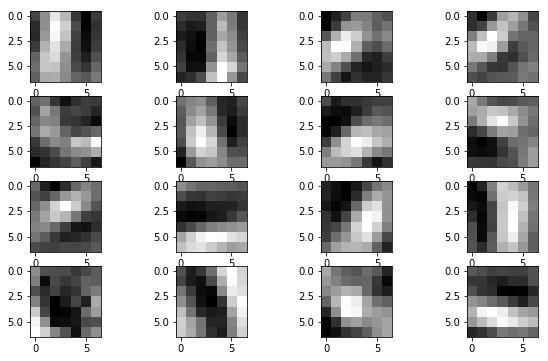

In [13]:
# look at the final kernel
k_w_final = k_w[:-1,:].reshape([7,7,16])
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10,6))

n=0;
for row in ax:
    for col in row:
        col.imshow(k_w_final[:,:,n], cmap='gray')
        n=n+1

plt.show()

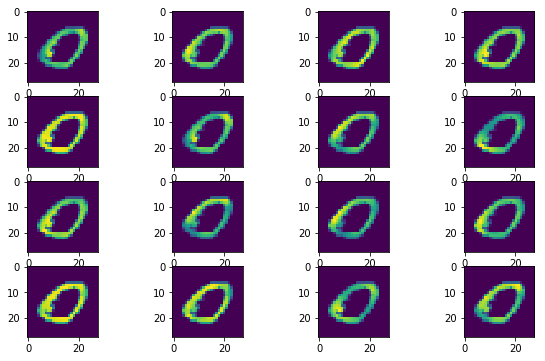

In [14]:
# look at the de-convolution image
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10,6))

n=0;
for row in ax:
    for col in row:
        col.imshow(recovered_img[:,:,n])
        n=n+1

plt.show()